<a href="https://colab.research.google.com/github/rushil1510/BTP/blob/main/BTP_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uploading the datasheet onto colab and making all imports

In [16]:
from google.colab import files
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
uploaded = files.upload()

Saving datasheet.xlsx to datasheet (1).xlsx


In [17]:
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)
print(df.head())

   CH4  C3H8   Equivalence_Ratio   Compression Pressure(atm)  \
0  1.0   0.0                 0.5                           1   
1  1.0   0.0                 0.5                           1   
2  1.0   0.0                 0.5                           1   
3  1.0   0.0                 0.5                           1   
4  1.0   0.0                 0.5                           1   

    Compression Temperature(K)   1000/T_(1/K)   Ignition_time  time  \
0                     700.0000       1.428571             0.0   0.0   
1                     708.0808       1.412268             0.0   0.0   
2                     716.1616       1.396333             0.0   0.0   
3                     724.2424       1.380753             0.0   0.0   
4                     732.3232       1.365517             0.0   0.0   

   Unnamed: 8 Unnamed: 9  
0         NaN        NaN  
1         NaN        NaN  
2         NaN        NaN  
3         NaN        NaN  
4         NaN        NaN  


Cleaning up the **dataframe**

In [18]:
df = df.iloc[:, :-2]
df = df.drop(columns=[' Ignition_time'])

Cleaning up the **dataset**

In [19]:
df.describe()
print(df.shape)
print(df.dtypes)
df.columns = ['x', 'y','phi','p','T','1000/T','idt']
print(df.columns)
df = df[df['p'] != 10].reset_index(drop=True)
df['phi'] = df['phi'].replace(np.nan, 0.5)
df = df[df['idt'] != 0].reset_index(drop=True)

(1400, 7)
CH4                            float64
C3H8                           float64
 Equivalence_Ratio             float64
 Compression Pressure(atm)       int64
 Compression Temperature(K)    float64
 1000/T_(1/K)                  float64
time                           float64
dtype: object
Index(['x', 'y', 'phi', 'p', 'T', '1000/T', 'idt'], dtype='object')


This is our main approach, we are going through multiple activation functions for the different values of x. We're also using BatchNormalization, Dropout Layers. We also added weight decay to adam

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 35: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 40: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 40: early stopping
Restoring model weights from the end of the best epoch: 30.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Results for x=0.2 with activation=relu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718       3.078125    0.266593
1   0.2  0.8  0.5   853.5354    7.562421       5.156250    2.406171
2   0.2  0.8  0.5  1031.3130    4.316119       3.943359    0.372760
3   0.2  0.8  0.5  1104.0400    3.219191       2.972656    0.246535
4   0.2  0.8  0.5   998.9899    4.797872       4.285156    0.512716
5   0.2  0.8  0.5  1079.7980    3.592467       3.292969    0.299498
6   0.2  0.8  0.5   934.3434    5.850882       4.679688    1.171194
7   0.2  0.8  0.5  1419.1920   -1.704948      -1.291992   -0.412956
8   0.2  0.8  0.5   885.8586    6.810114       4.960938    1.849176


<ipython-input-21-0272c57795ba>:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


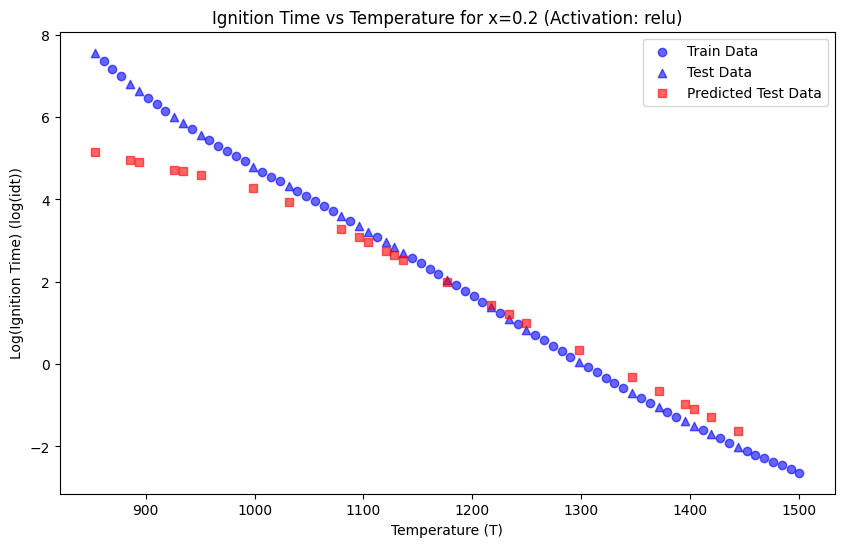

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 42: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 47: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 47: early stopping
Restoring model weights from the end of the best epoch: 37.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Results for x=0.2 with activation=leaky_relu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718       4.160156   -0.815439
1   0.2  0.8  0.5   853.5354    7.562421       8.570312   -1.007891
2   0.2  0.8  0.5  1031.3130    4.316119       5.363281   -1.047162
3   0.2  0.8  0.5  1104.0400    3.219191       4.011719   -0.792527
4   0.2  0.8  0.5   998.9899    4.797872       5.949219   -1.151347
5   0.2  0.8  0.5  1079.7980    3.592467       4.460938   -0.868470
6   0.2  0.8  0.5   934.3434    5.850882       7.144531   -1.293649
7   0.2  0.8  0.5  1419.1920   -1.704948      -1.910156    0.205208
8   0.2  0.8  0.5   885.8586    6.810114       8.039062   -1.2

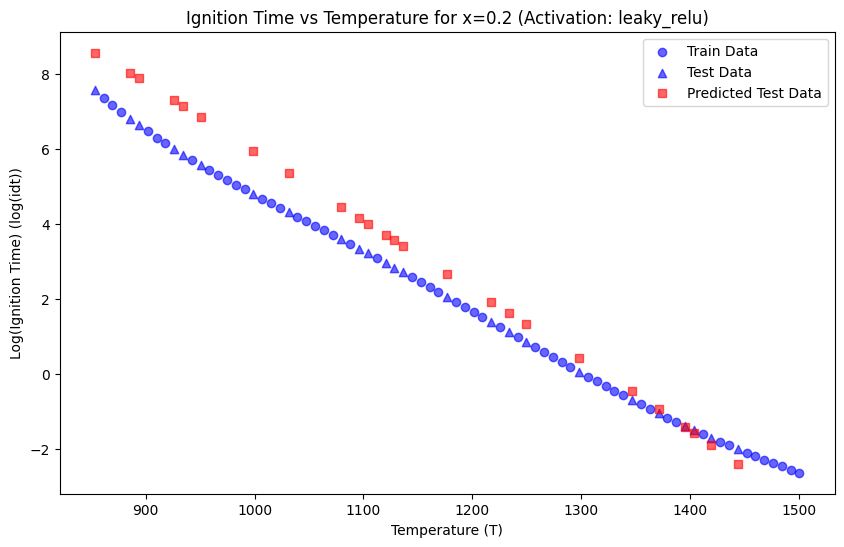

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 32: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 37: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 37: early stopping
Restoring model weights from the end of the best epoch: 27.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Results for x=0.2 with activation=elu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718       2.861328    0.483390
1   0.2  0.8  0.5   853.5354    7.562421       5.269531    2.292890
2   0.2  0.8  0.5  1031.3130    4.316119       3.703125    0.612994
3   0.2  0.8  0.5  1104.0400    3.219191       2.761719    0.457473
4   0.2  0.8  0.5   998.9899    4.797872       4.062500    0.735372
5   0.2  0.8  0.5  1079.7980    3.592467       3.076172    0.516295
6   0.2  0.8  0.5   934.3434    5.850882       4.660156    1.190726
7   0.2  0.8  0.5  1419.1920   -1.704948      -1.034180   -0.670769
8   0.2  0.8  0.5   885.8586    6.810114       5.039062    1.771051
9

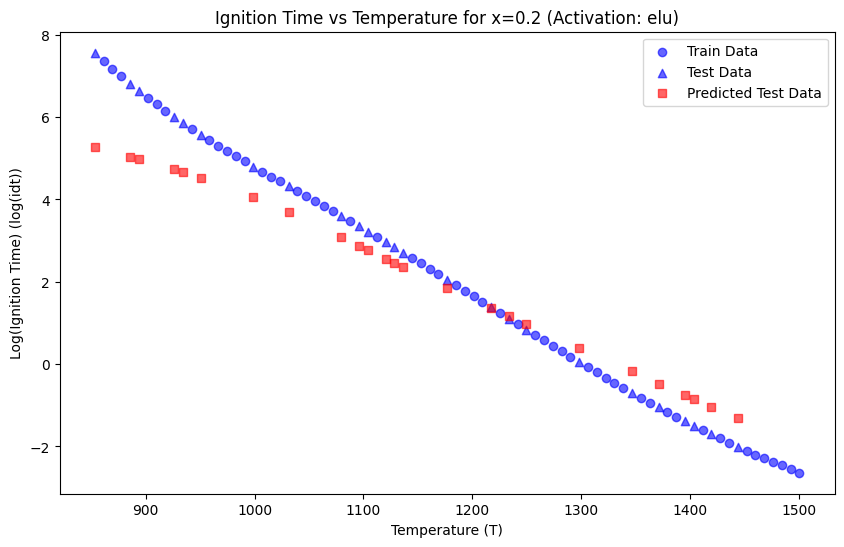

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 5.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Results for x=0.2 with activation=selu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718       1.014648    2.330069
1   0.2  0.8  0.5   853.5354    7.562421       0.395996    7.166425
2   0.2  0.8  0.5  1031.3130    4.316119       0.783203    3.532916
3   0.2  0.8  0.5  1104.0400    3.219191       1.032227    2.186965
4   0.2  0.8  0.5   998.9899    4.797872       0.702148    4.095723
5   0.2  0.8  0.5  1079.7980    3.592467       0.958496    2.633971
6   0.2  0.8  0.5   934.3434    5.850882       0.555176    5.295706
7   0.2  0.8  0.5  1419.1920   -1.704948       1.920898   -3.625847
8   0.2  0.8  0.5   885.8586    6.810114       0.454102    6.356012
9

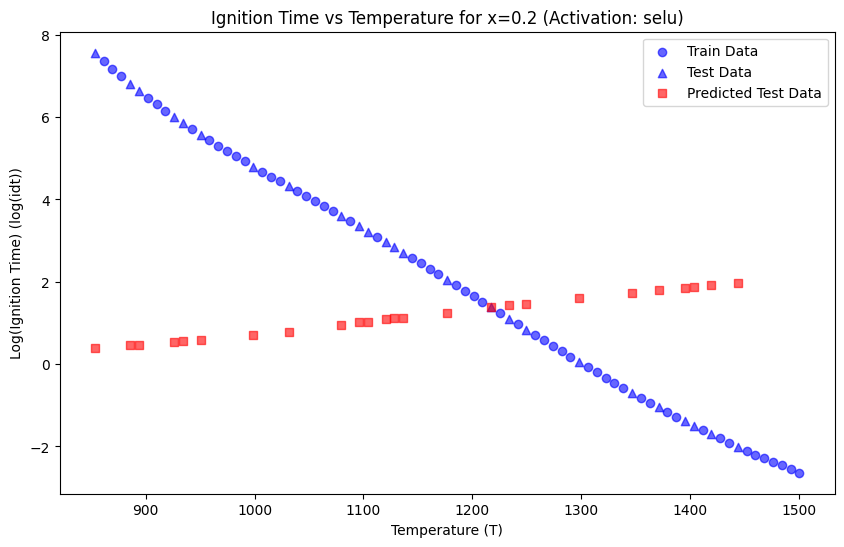

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 53: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 67: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 76: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 81: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
Epoch 81: early stopping
Restoring model weights from the end of the best epoch: 71.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Results for x=0.2 with activation=softplus:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718       2.927734    0.416983
1   0.2  0.8  0.5   853.5354    7.562421       6.601562    0.960859
2   0.2  0.8  0.5  1031.3130    4.316119       3.855469    0.460650
3   0.2  0.8  0.5  1104.0400    3.219191       2.816406    0.402785
4   0.2  0.8  0.5   998.9899    4.797872       4.328125    0.469747
5   0.2  0.8  0.5  1079.7980    3.59

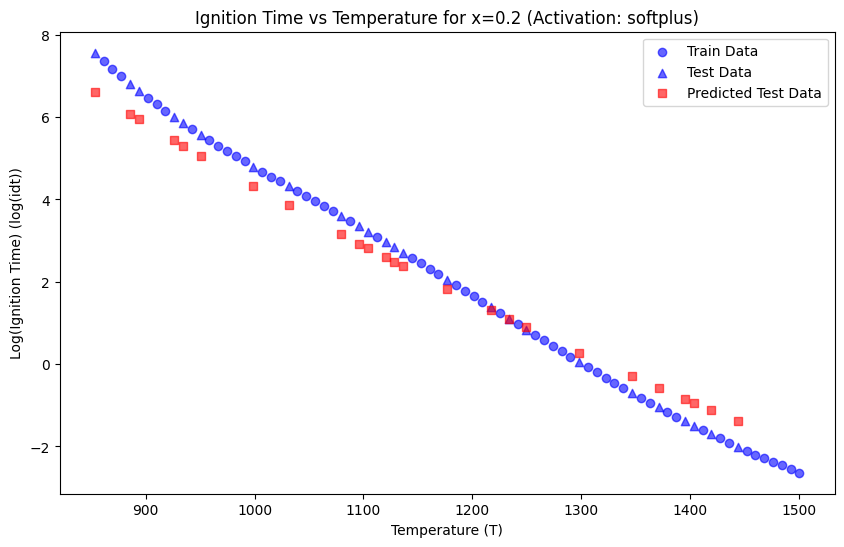

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 34: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 39: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 39: early stopping
Restoring model weights from the end of the best epoch: 29.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Results for x=0.2 with activation=swish:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718       2.111328    1.233390
1   0.2  0.8  0.5   853.5354    7.562421       3.218750    4.343671
2   0.2  0.8  0.5  1031.3130    4.316119       2.453125    1.862994
3   0.2  0.8  0.5  1104.0400    3.219191       2.068359    1.150832
4   0.2  0.8  0.5   998.9899    4.797872       2.607422    2.190450
5   0.2  0.8  0.5  1079.7980    3.592467       2.197266    1.395201
6   0.2  0.8  0.5   934.3434    5.850882       2.894531    2.956351
7   0.2  0.8  0.5  1419.1920   -1.704948      -0.159668   -1.545280
8   0.2  0.8  0.5   885.8586    6.810114       3.093750    3.716364

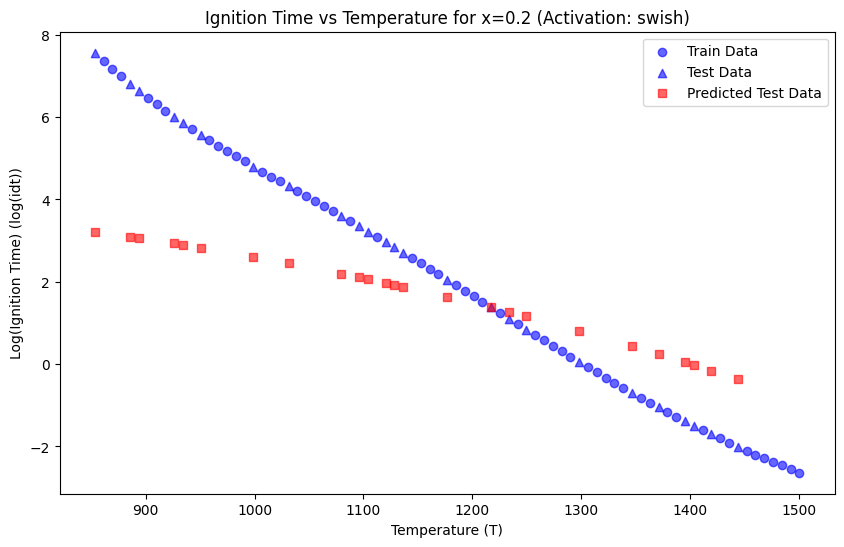

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 84: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 89: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 89: early stopping
Restoring model weights from the end of the best epoch: 79.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Results for x=0.2 with activation=gelu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.2  0.8  0.5  1095.9600    3.344718       3.244141    0.100577
1   0.2  0.8  0.5   853.5354    7.562421       6.156250    1.406171
2   0.2  0.8  0.5  1031.3130    4.316119       4.128906    0.187213
3   0.2  0.8  0.5  1104.0400    3.219191       3.128906    0.090285
4   0.2  0.8  0.5   998.9899    4.797872       4.531250    0.266622
5   0.2  0.8  0.5  1079.7980    3.592467       3.468750    0.123717
6   0.2  0.8  0.5   934.3434    5.850882       5.281250    0.569632
7   0.2  0.8  0.5  1419.1920   -1.704948      -1.498047   -

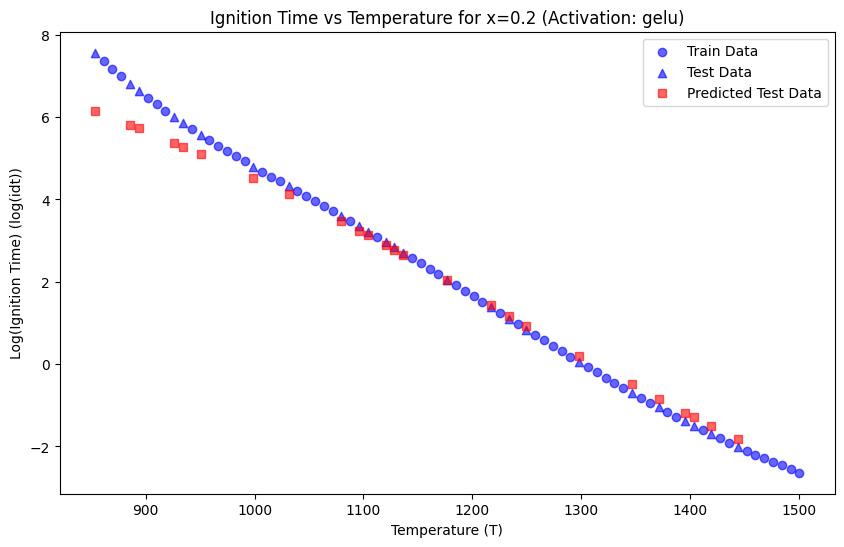

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Results for x=0.4 with activation=relu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701       1.823242    1.501459
1   0.4  0.6  0.5   861.6162    7.452467       1.384766    6.067702
2   0.4  0.6  0.5  1039.3940    4.321417       1.705078    2.616339
3   0.4  0.6  0.5  1112.1210    3.194919       1.853516    1.341404
4   0.4  0.6  0.5  1007.0710    4.802986       1.656250    3.146736
5   0.4  0.6  0.5  1087.8790    3.580634       1.810547    1.770087
6   0.4  0.6  0.5   942.4242    5.821275       1.524414    4.296860
7   0.4  0.6  0.5  1427.2730   -1.742427       2.453125   -4.195552
8   0.4  0.6  0.5   893.9394    6.733608       1.434570    5.299038
9  

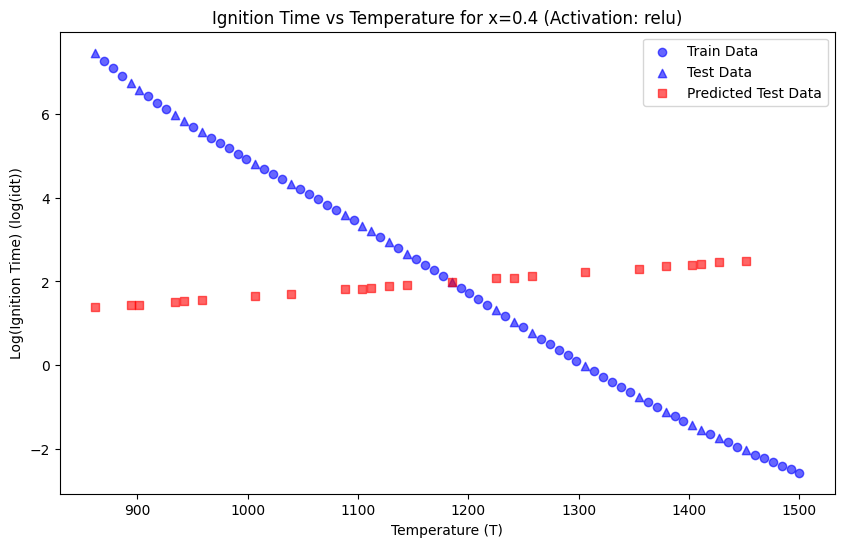

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Results for x=0.4 with activation=leaky_relu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701      -3.015625    6.340326
1   0.4  0.6  0.5   861.6162    7.452467      -2.337891    9.790358
2   0.4  0.6  0.5  1039.3940    4.321417      -2.837891    7.159308
3   0.4  0.6  0.5  1112.1210    3.194919      -3.070312    6.265232
4   0.4  0.6  0.5  1007.0710    4.802986      -2.742188    7.545174
5   0.4  0.6  0.5  1087.8790    3.580634      -2.994141    6.574775
6   0.4  0.6  0.5   942.4242    5.821275      -2.552734    8.374009
7   0.4  0.6  0.5  1427.2730   -1.742427      -3.972656    2.230230
8   0.4  0.6  0.5   893.9394    6.733608      -2.421875    9.1554

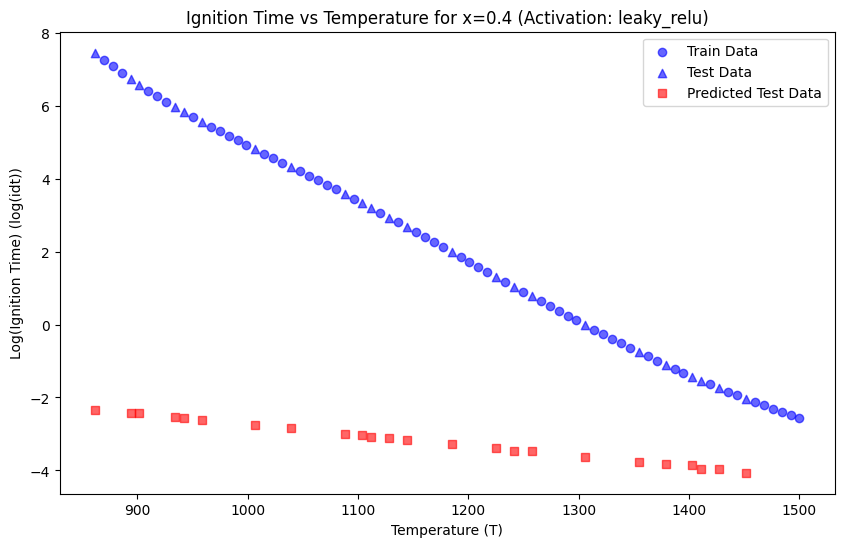

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 43: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 59: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 90: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Restoring model weights from the end of the best epoch: 100.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Results for x=0.4 with activation=elu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701       3.128906    0.195795
1   0.4  0.6  0.5   861.6162    7.452467       5.585938    1.866530
2   0.4  0.6  0.5  1039.3940    4.321417       3.949219    0.372199
3   0.4  0.6  0.5  1112.1210    3.194919       3.023438    0.171482
4   0.4  0.6  0.5  1007.0710    4.802986       4.300781    0.502205
5   0.4  0.6  0.5  1087.8790    3.580634       3.339844    0.240790
6   0.4  0.6  0.5   942.4242    5.821275       4.925781    0.895493
7   0.4

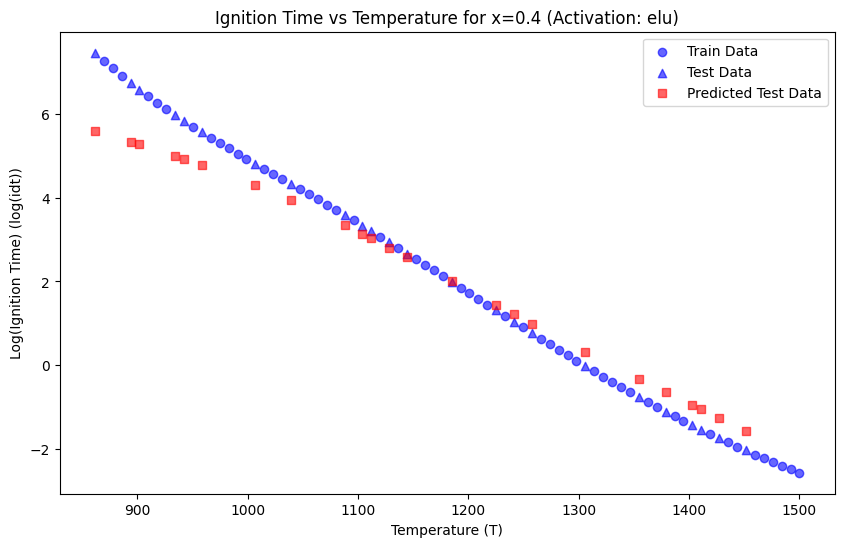

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Results for x=0.4 with activation=selu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701      -2.757812    6.082514
1   0.4  0.6  0.5   861.6162    7.452467      -2.455078    9.907546
2   0.4  0.6  0.5  1039.3940    4.321417      -2.673828    6.995245
3   0.4  0.6  0.5  1112.1210    3.194919      -2.763672    5.958591
4   0.4  0.6  0.5  1007.0710    4.802986      -2.634766    7.437752
5   0.4  0.6  0.5  1087.8790    3.580634      -2.740234    6.320868
6   0.4  0.6  0.5   942.4242    5.821275      -2.558594    8.379868
7   0.4  0.6  0.5  1427.2730   -1.742427      -3.156250    1.413823
8   0.4  0.6  0.5   893.9394    6.733608      -2.492188    9.225796
9 

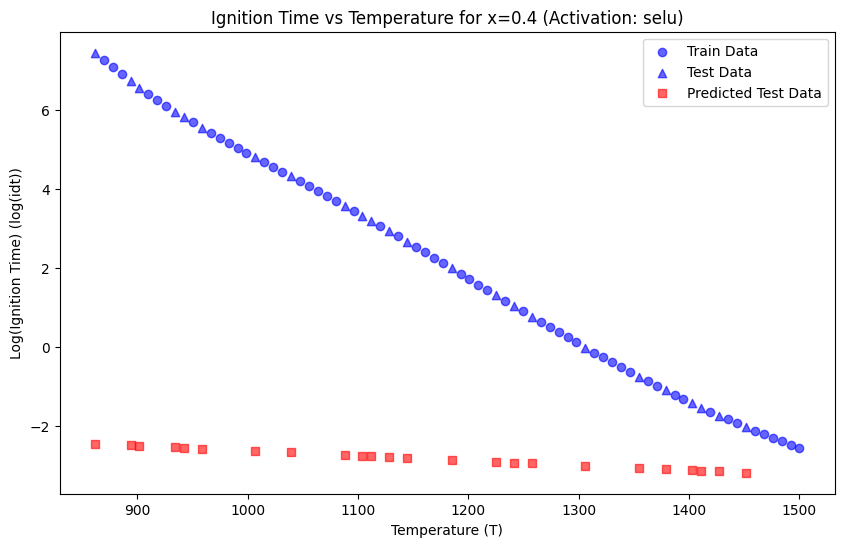

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 13: early stopping
Restoring model weights from the end of the best epoch: 3.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Results for x=0.4 with activation=softplus:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701       1.776367    1.548334
1   0.4  0.6  0.5   861.6162    7.452467       1.355469    6.096999
2   0.4  0.6  0.5  1039.3940    4.321417       1.668945    2.652472
3   0.4  0.6  0.5  1112.1210    3.194919       1.791992    1.402927
4   0.4  0.6  0.5  1007.0710    4.802986       1.610352    3.192635
5   0.4  0.6  0.5  1087.8790    3.580634       1.752930    1.827704
6   0.4  0.6  0.5   942.4242    5.821275       1.501953    4.319321
7   0.4  0.6  0.5  1427.2730   -1.742427       2.302734   -4.045161
8   0.4  0.6  0.5   893.9394    6.733608       1.410156    5.32345

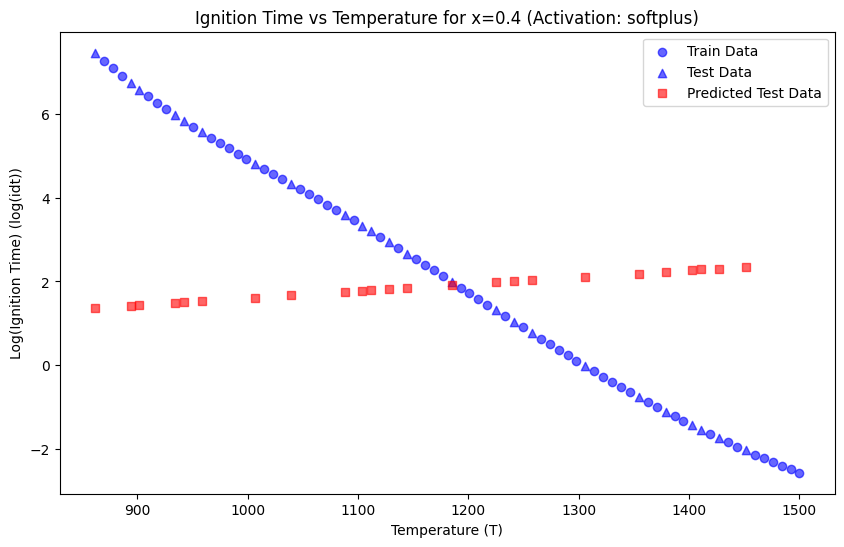

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 21: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 26: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 26: early stopping
Restoring model weights from the end of the best epoch: 16.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Results for x=0.4 with activation=swish:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701       1.521484    1.803217
1   0.4  0.6  0.5   861.6162    7.452467       1.402344    6.050124
2   0.4  0.6  0.5  1039.3940    4.321417       1.617188    2.704230
3   0.4  0.6  0.5  1112.1210    3.194919       1.501953    1.692966
4   0.4  0.6  0.5  1007.0710    4.802986       1.646484    3.156502
5   0.4  0.6  0.5  1087.8790    3.580634       1.546875    2.033759
6   0.4  0.6  0.5   942.4242    5.821275       1.630859    4.190415
7   0.4  0.6  0.5  1427.2730   -1.742427       0.415283   

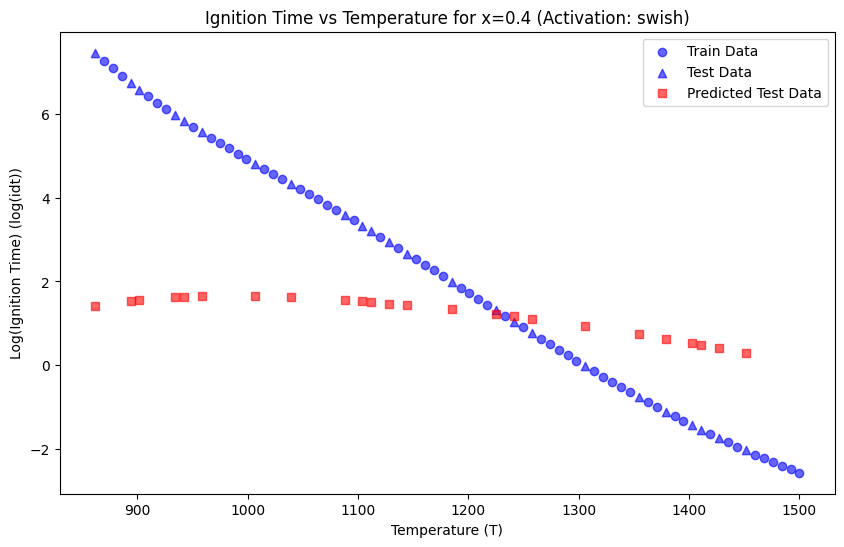

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Results for x=0.4 with activation=gelu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.4  0.6  0.5  1104.0400    3.324701       1.412109    1.912592
1   0.4  0.6  0.5   861.6162    7.452467       0.995605    6.456862
2   0.4  0.6  0.5  1039.3940    4.321417       1.291016    3.030402
3   0.4  0.6  0.5  1112.1210    3.194919       1.418945    1.775974
4   0.4  0.6  0.5  1007.0710    4.802986       1.239258    3.563728
5   0.4  0.6  0.5  1087.8790    3.580634       1.376953    2.203681
6   0.4  0.6  0.5   942.4242    5.821275       1.141602    4.679673
7   0.4  0.6  0.5  1427.2730   -1.742427       1.921875   -3.664302
8   0.4  0.6  0.5   893.9394    6.733608       1.051758    5.681850
9 

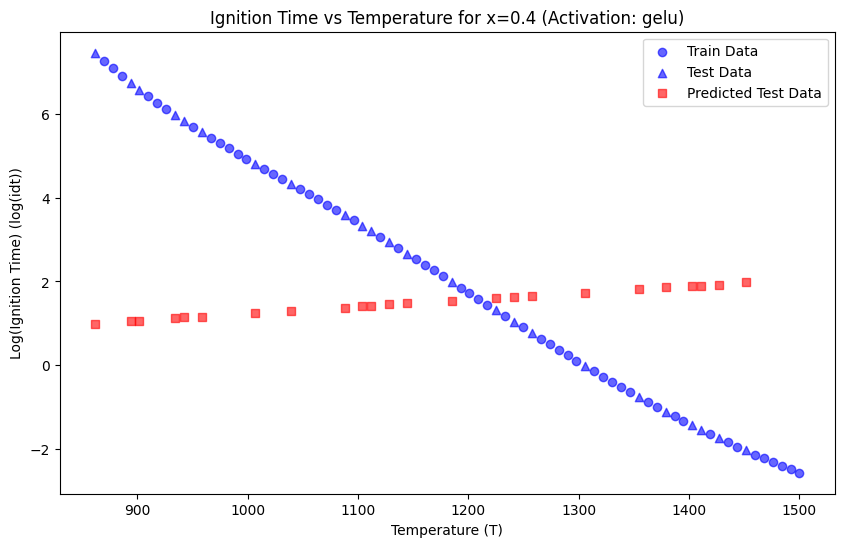

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 31: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 36: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 36: early stopping
Restoring model weights from the end of the best epoch: 26.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Results for x=0.6 with activation=relu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       2.773438    0.729086
1   0.6  0.4  0.5   861.6162    7.596330       4.105469    3.490861
2   0.6  0.4  0.5  1039.3940    4.529353       3.193359    1.335994
3   0.6  0.4  0.5  1112.1210    3.368390       2.722656    0.645734
4   0.6  0.4  0.5  1007.0710    5.015671       3.404297    1.611374
5   0.6  0.4  0.5  1087.8790    3.767292       2.876953    0.890339
6   0.6  0.4  0.5   942.4242    6.013630       3.746094    2.267536
7   0.6  0.4  0.5  1427.2730   -1.603043      -1.022461   -

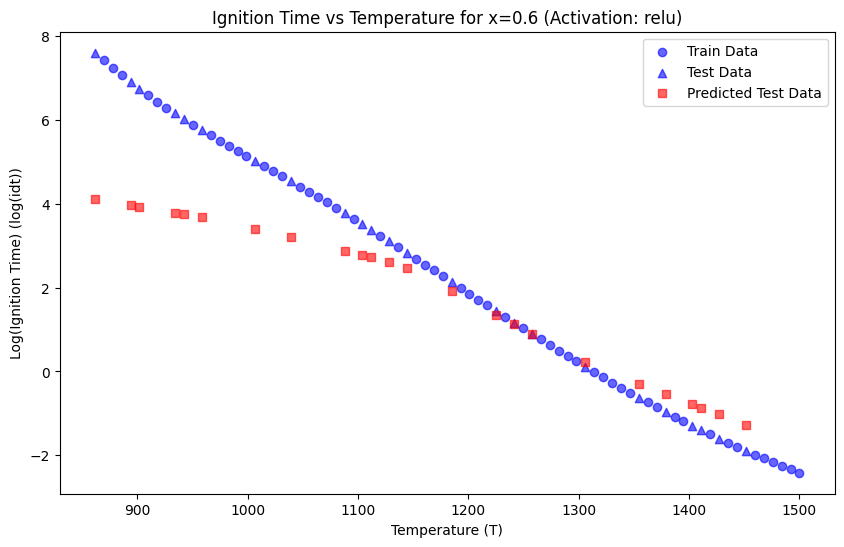

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Results for x=0.6 with activation=leaky_relu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524      -2.996094    6.498618
1   0.6  0.4  0.5   861.6162    7.596330      -2.289062    9.885392
2   0.6  0.4  0.5  1039.3940    4.529353      -2.804688    7.334041
3   0.6  0.4  0.5  1112.1210    3.368390      -3.035156    6.403547
4   0.6  0.4  0.5  1007.0710    5.015671      -2.718750    7.734421
5   0.6  0.4  0.5  1087.8790    3.767292      -2.957031    6.724323
6   0.6  0.4  0.5   942.4242    6.013630      -2.531250    8.544880
7   0.6  0.4  0.5  1427.2730   -1.603043      -3.980469    2.377425
8   0.6  0.4  0.5   893.9394    6.896028      -2.380859    9.276

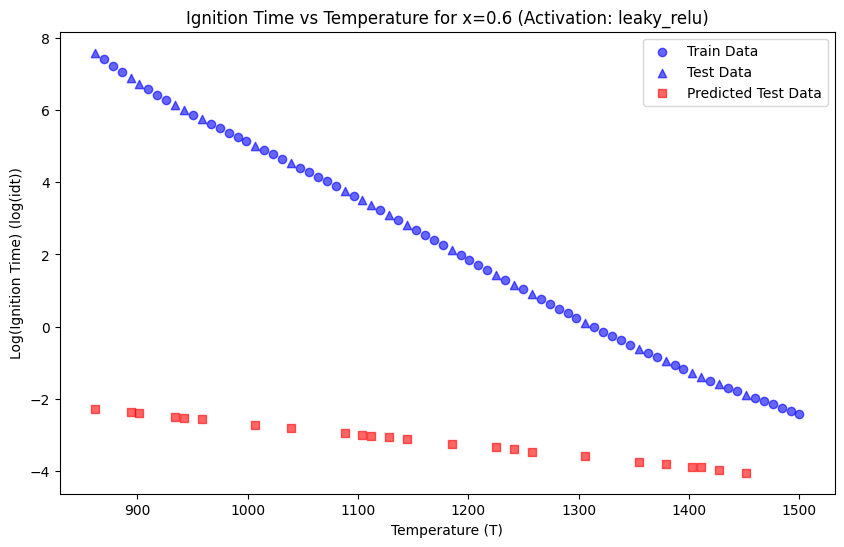

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 56: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 74: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 79: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 79: early stopping
Restoring model weights from the end of the best epoch: 69.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Results for x=0.6 with activation=elu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       2.978516    0.524008
1   0.6  0.4  0.5   861.6162    7.596330       5.699219    1.897111
2   0.6  0.4  0.5  1039.3940    4.529353       3.763672    0.765681
3   0.6  0.4  0.5  1112.1210    3.368390       2.880859    0.487531
4   0.6  0.4  0.5  1007.0710    5.015671       4.132812    0.882858
5   0.6  0.4  0.5  1087.8790    3.767292       3.177734    0.589558
6   0.6  0.4  0.5   942.4242    6.013630       4.84

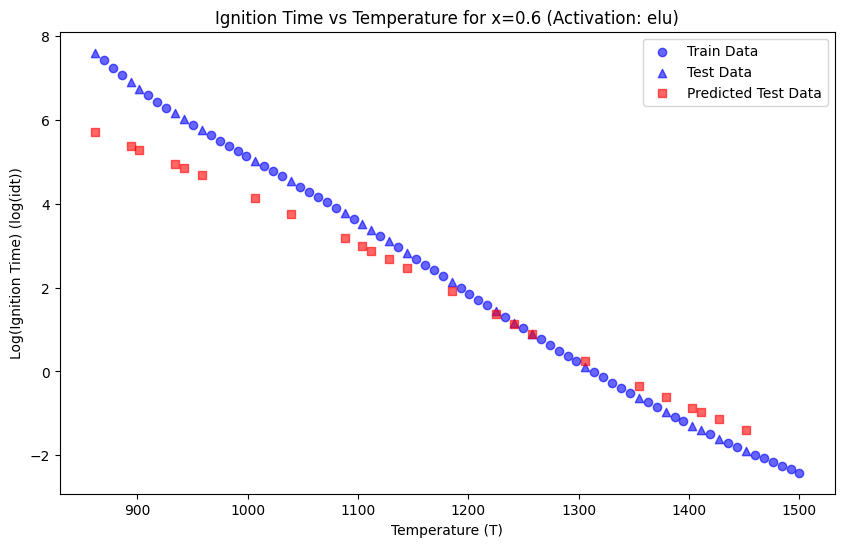

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 21: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 26: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 26: early stopping
Restoring model weights from the end of the best epoch: 16.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Results for x=0.6 with activation=selu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       2.722656    0.779868
1   0.6  0.4  0.5   861.6162    7.596330       4.542969    3.053361
2   0.6  0.4  0.5  1039.3940    4.529353       3.175781    1.353572
3   0.6  0.4  0.5  1112.1210    3.368390       2.667969    0.700422
4   0.6  0.4  0.5  1007.0710    5.015671       3.402344    1.613327
5   0.6  0.4  0.5  1087.8790    3.767292       2.832031    0.935261
6   0.6  0.4  0.5   942.4242    6.013630       3.871094    2.142536
7   0.6  0.4  0.5  1427.2730   -1.603043       0.570801   -2.173844
8   0.6  0.4  0.5   893.9394    6.896028       4.257812    2.638216


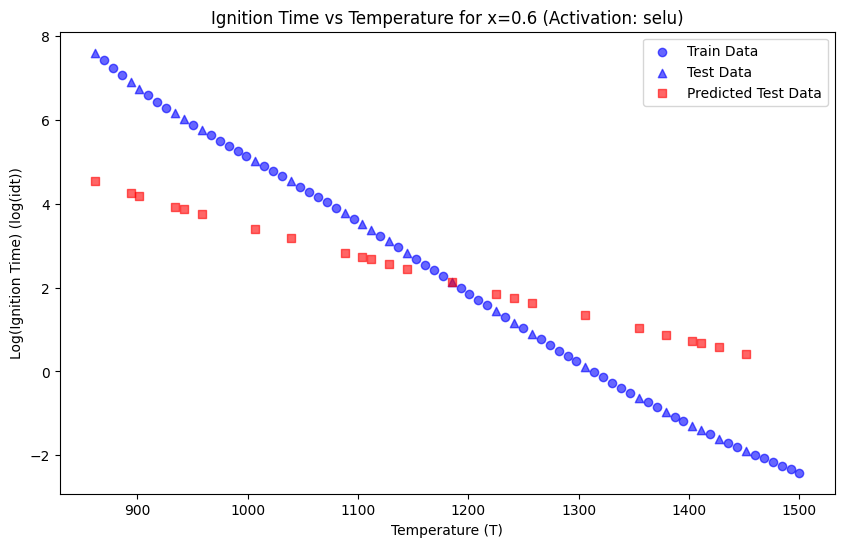

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 68: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 73: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 73: early stopping
Restoring model weights from the end of the best epoch: 63.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
Results for x=0.6 with activation=softplus:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       2.906250    0.596274
1   0.6  0.4  0.5   861.6162    7.596330       5.921875    1.674455
2   0.6  0.4  0.5  1039.3940    4.529353       3.697266    0.832088
3   0.6  0.4  0.5  1112.1210    3.368390       2.810547    0.557844
4   0.6  0.4  0.5  1007.0710    5.015671       4.093750    0.921921
5   0.6  0.4  0.5  1087.8790    3.767292       3.097656    0.669636
6   0.6  0.4  0.5   942.4242    6.013630       4.894531    1.119099
7   0.6  0.4  0.5  1427.2730   -1.603043      -0.675781

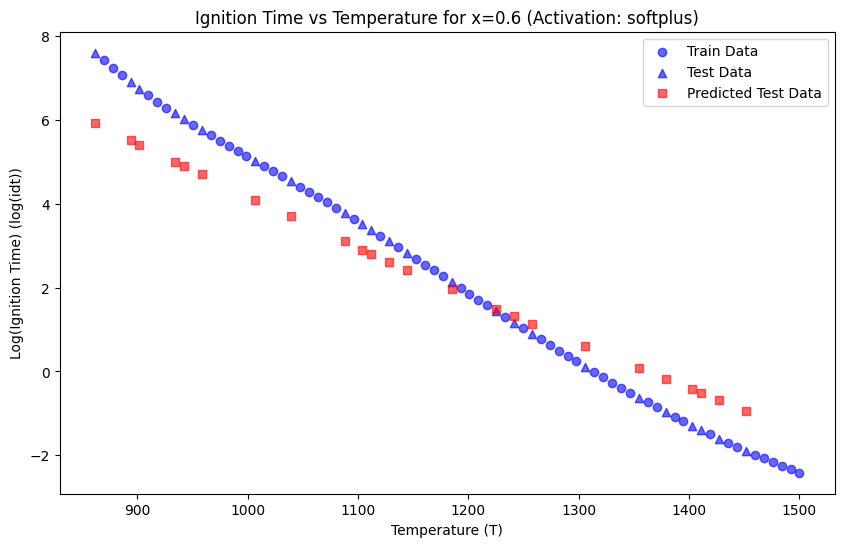

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 18: early stopping
Restoring model weights from the end of the best epoch: 8.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Results for x=0.6 with activation=swish:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       1.047852    2.454672
1   0.6  0.4  0.5   861.6162    7.596330       0.302490    7.293839
2   0.6  0.4  0.5  1039.3940    4.529353       0.857422    3.671931
3   0.6  0.4  0.5  1112.1210    3.368390       1.073242    2.295148
4   0.6  0.4  0.5  1007.0710    5.015671       0.762207    4.253464
5   0.6  0.4  0.5  1087.8790    3.767292       1.000977    2.766316
6   0.6  0.4  0.5   942.4242    6.013630       0.567383    5.446247
7   0.6  0.4  0.5  1427.2730   -1.603043       2.031250   -3.634293
8   0.6  0.4  0.5   893.9394    6.896028       0.412109    6.483919


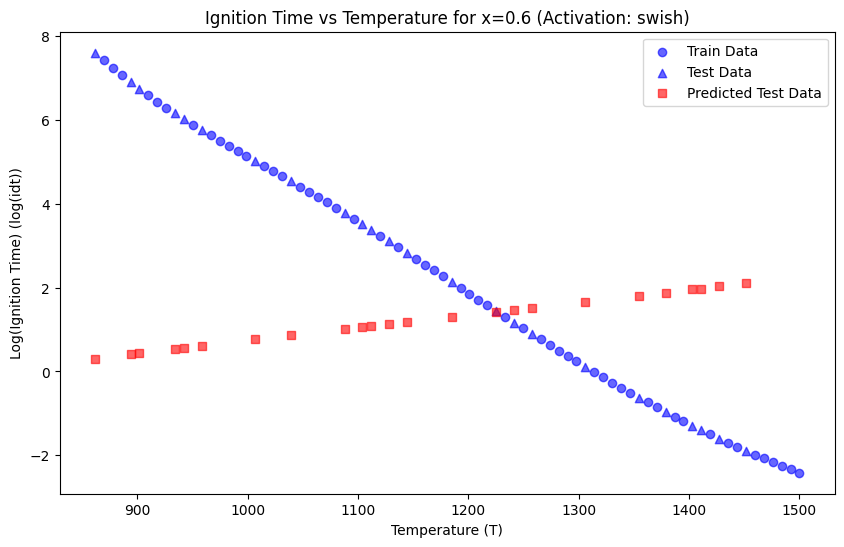

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 38: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 43: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 43: early stopping
Restoring model weights from the end of the best epoch: 33.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Results for x=0.6 with activation=gelu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.6  0.4  0.5  1104.0400    3.502524       3.142578    0.359946
1   0.6  0.4  0.5   861.6162    7.596330       5.421875    2.174455
2   0.6  0.4  0.5  1039.3940    4.529353       3.753906    0.775447
3   0.6  0.4  0.5  1112.1210    3.368390       3.070312    0.298078
4   0.6  0.4  0.5  1007.0710    5.015671       4.050781    0.964889
5   0.6  0.4  0.5  1087.8790    3.767292       3.294922    0.472370
6   0.6  0.4  0.5   942.4242    6.013630       4.648438    1.365192
7   0.6  0.4  0.5  1427.2730   -1.603043      -0.415039   -1.188004
8   0.6  0.4  0.5   893.9394    6.896028       5.109375    1.786653


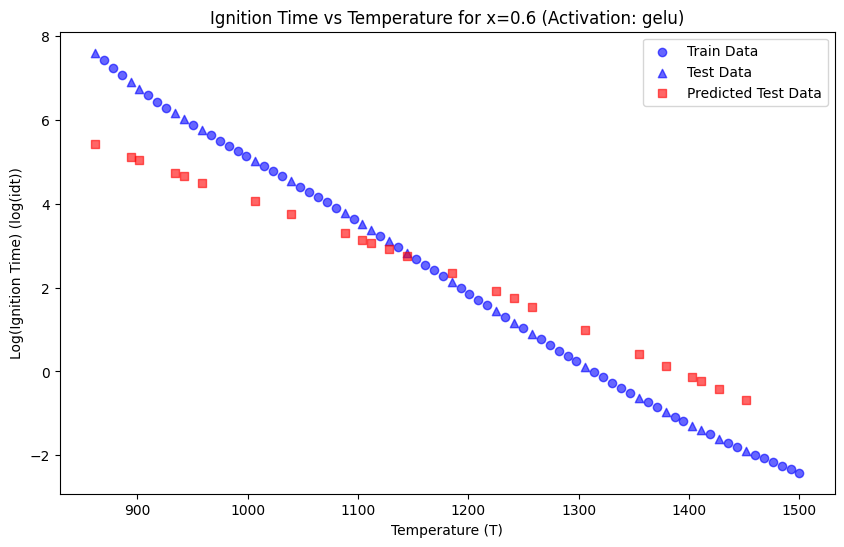

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 42: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 47: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 47: early stopping
Restoring model weights from the end of the best epoch: 37.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Results for x=0.8 with activation=relu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       3.275391    3.021229
1   0.8  0.2  0.5  1427.2730   -1.236471       0.135742   -1.372213
2   0.8  0.2  0.5  1063.6360    4.561330       2.064453    2.496877
3   0.8  0.2  0.5   918.1818    6.808899       3.658203    3.150696
4   0.8  0.2  0.5  1144.4440    3.172562       1.650391    1.522171
5   0.8  0.2  0.5  1500.0000   -2.052887      -0.042969   -2.009918
6   0.8  0.2  0.5   998.9899    5.574035       2.757812    2.816222
7   0.8  0.2  0.5  1192.9290    2.323434       1.406250    0.917184
8   0.8  0.2  0.5  1015.1520    5.329972       2.587891    2.742081


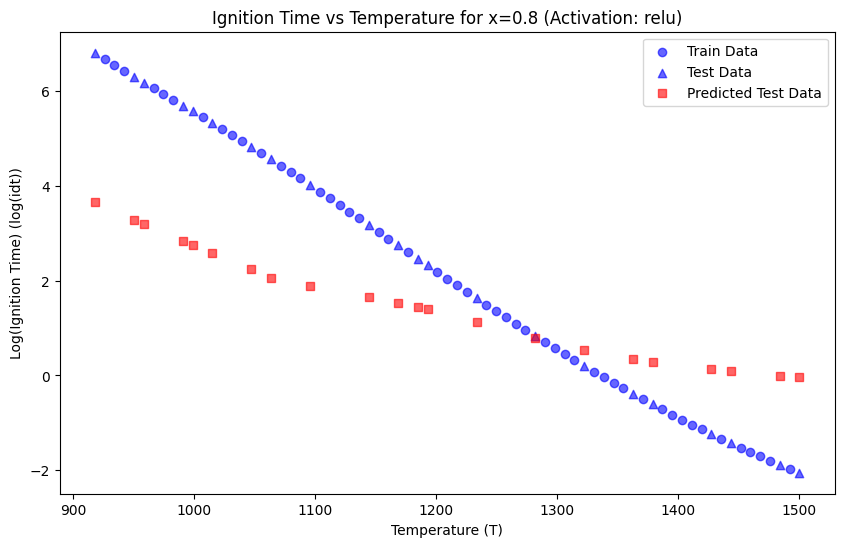

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 12: early stopping
Restoring model weights from the end of the best epoch: 2.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Results for x=0.8 with activation=leaky_relu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619      -3.109375    9.405994
1   0.8  0.2  0.5  1427.2730   -1.236471      -5.039062    3.802592
2   0.8  0.2  0.5  1063.6360    4.561330      -3.572266    8.133596
3   0.8  0.2  0.5   918.1818    6.808899      -2.986328    9.795227
4   0.8  0.2  0.5  1144.4440    3.172562      -3.902344    7.074905
5   0.8  0.2  0.5  1500.0000   -2.052887      -5.335938    3.283051
6   0.8  0.2  0.5   998.9899    5.574035      -3.310547    8.884582
7   0.8  0.2  0.5  1192.9290    2.323434      -4.101562    6.424997
8   0.8  0.2  0.5  1015.1520    5.329972      -3.375000    8.704

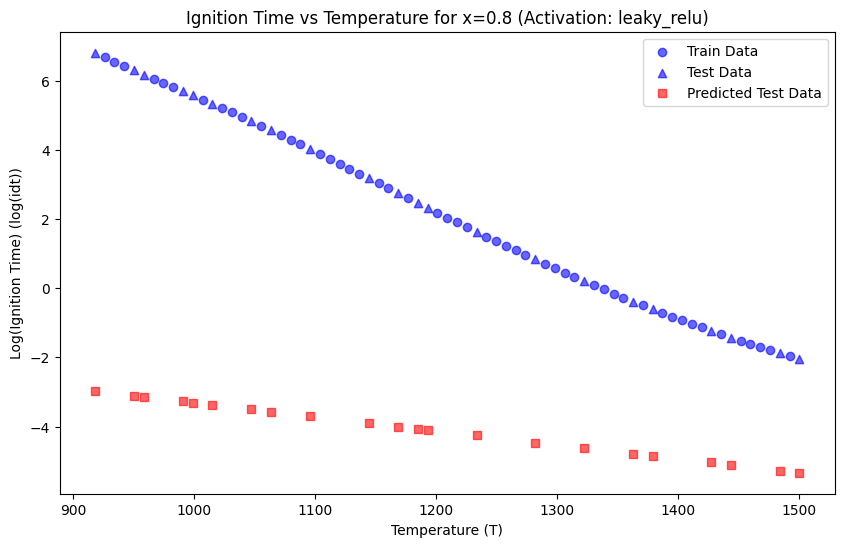

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Results for x=0.8 with activation=elu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       0.536133    5.760486
1   0.8  0.2  0.5  1427.2730   -1.236471       1.309570   -2.546041
2   0.8  0.2  0.5  1063.6360    4.561330       0.723145    3.838185
3   0.8  0.2  0.5   918.1818    6.808899       0.490967    6.317933
4   0.8  0.2  0.5  1144.4440    3.172562       0.851562    2.320999
5   0.8  0.2  0.5  1500.0000   -2.052887       1.424805   -3.477692
6   0.8  0.2  0.5   998.9899    5.574035       0.610352    4.963683
7   0.8  0.2  0.5  1192.9290    2.323434       0.934570    1.388864
8   0.8  0.2  0.5  1015.1520    5.329972       0.637207    4.692765
9  

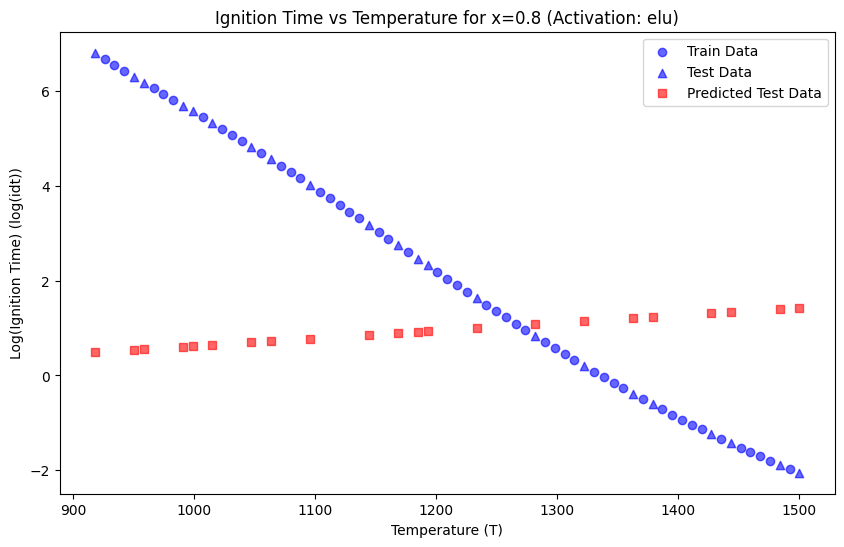

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 59: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 64: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 64: early stopping
Restoring model weights from the end of the best epoch: 54.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Results for x=0.8 with activation=selu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       5.238281    1.058338
1   0.8  0.2  0.5  1427.2730   -1.236471      -1.124023   -0.112447
2   0.8  0.2  0.5  1063.6360    4.561330       4.007812    0.553517
3   0.8  0.2  0.5   918.1818    6.808899       5.578125    1.230774
4   0.8  0.2  0.5  1144.4440    3.172562       3.054688    0.117874
5   0.8  0.2  0.5  1500.0000   -2.052887      -2.025391   -0.027496
6   0.8  0.2  0.5   998.9899    5.574035       4.726562    0.847472
7   0.8  0.2  0.5  1192.9290    2.323434       2.378906   -0.055472
8   0.8  0.2  0.5  1015.1520    5.329972       4.550781    0.779190


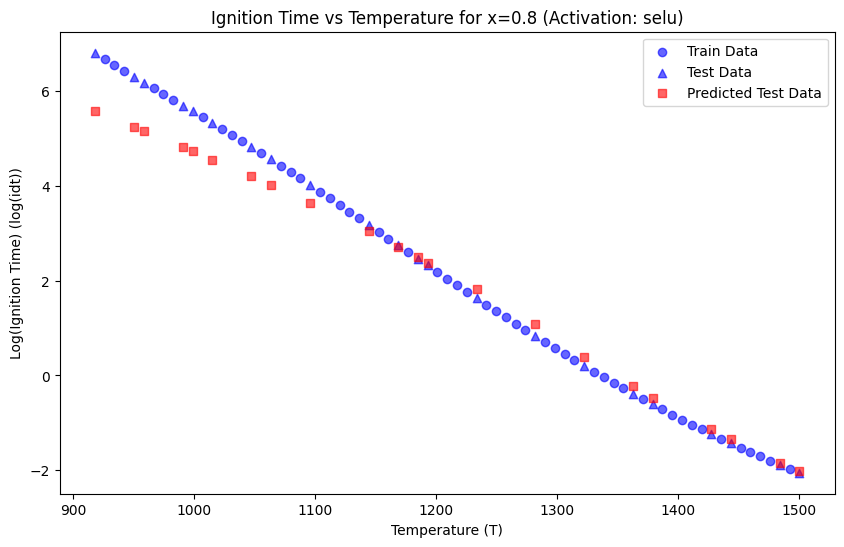

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 33: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 38: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 38: early stopping
Restoring model weights from the end of the best epoch: 28.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Results for x=0.8 with activation=softplus:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       4.425781    1.870838
1   0.8  0.2  0.5  1427.2730   -1.236471       0.814453   -2.050924
2   0.8  0.2  0.5  1063.6360    4.561330       3.554688    1.006642
3   0.8  0.2  0.5   918.1818    6.808899       4.683594    2.125306
4   0.8  0.2  0.5  1144.4440    3.172562       2.949219    0.223343
5   0.8  0.2  0.5  1500.0000   -2.052887       0.246338   -2.299225
6   0.8  0.2  0.5   998.9899    5.574035       4.050781    1.523254
7   0.8  0.2  0.5  1192.9290    2.323434       2.582031   -0.258597
8   0.8  0.2  0.5  1015.1520    5.329972       3.923828    1.406

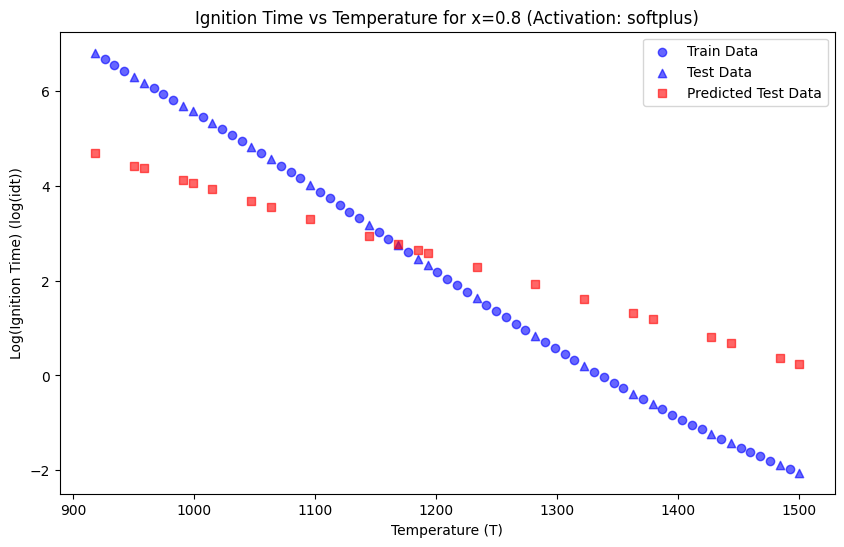

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 18: early stopping
Restoring model weights from the end of the best epoch: 8.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Results for x=0.8 with activation=swish:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       0.402588    5.894031
1   0.8  0.2  0.5  1427.2730   -1.236471       1.722656   -2.959127
2   0.8  0.2  0.5  1063.6360    4.561330       0.748535    3.812795
3   0.8  0.2  0.5   918.1818    6.808899       0.302734    6.506165
4   0.8  0.2  0.5  1144.4440    3.172562       0.976074    2.196487
5   0.8  0.2  0.5  1500.0000   -2.052887       1.909180   -3.962067
6   0.8  0.2  0.5   998.9899    5.574035       0.553711    5.020324
7   0.8  0.2  0.5  1192.9290    2.323434       1.112305    1.211130
8   0.8  0.2  0.5  1015.1520    5.329972       0.601562    4.728409


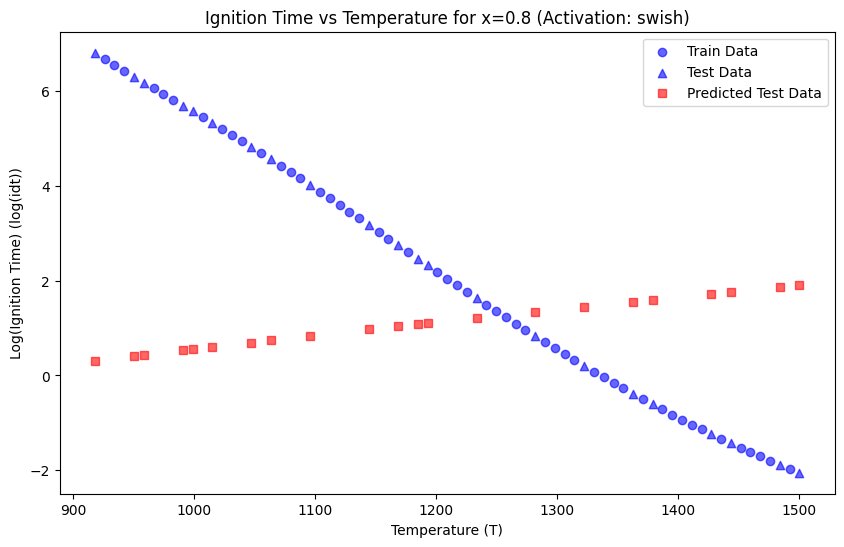

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 13: early stopping
Restoring model weights from the end of the best epoch: 3.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Results for x=0.8 with activation=gelu:
      x    y  phi          T  Actual idt  Predicted idt  Difference
0   0.8  0.2  0.5   950.5051    6.296619       1.249023    5.047596
1   0.8  0.2  0.5  1427.2730   -1.236471       2.281250   -3.517721
2   0.8  0.2  0.5  1063.6360    4.561330       1.491211    3.070119
3   0.8  0.2  0.5   918.1818    6.808899       1.178711    5.630188
4   0.8  0.2  0.5  1144.4440    3.172562       1.664062    1.508499
5   0.8  0.2  0.5  1500.0000   -2.052887       2.439453   -4.492340
6   0.8  0.2  0.5   998.9899    5.574035       1.352539    4.221496
7   0.8  0.2  0.5  1192.9290    2.323434       1.770508    0.552926
8   0.8  0.2  0.5  1015.1520    5.329972       1.384766    3.945206
9 

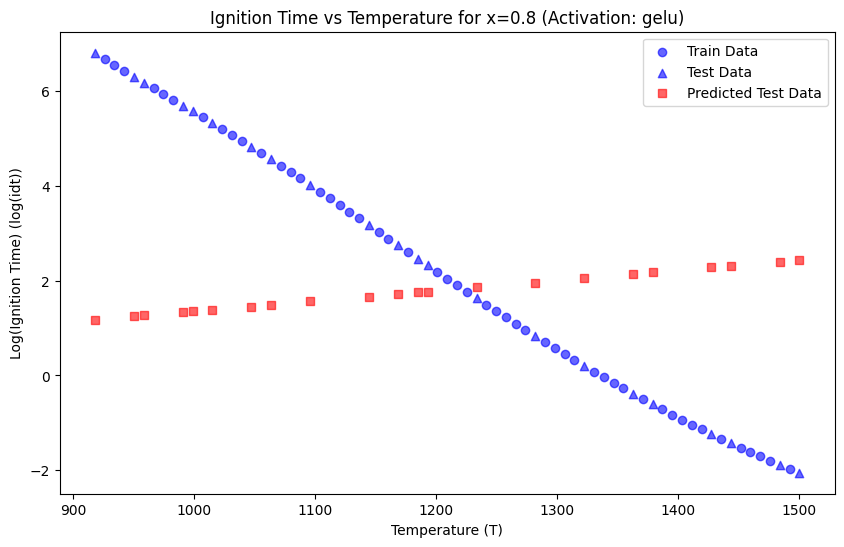

In [21]:
# Enable mixed precision for faster computation on compatible hardware
tf.keras.mixed_precision.set_global_policy('mixed_float16')
# Initialize a DataFrame to store results
results = pd.DataFrame(columns=['x', 'activation', 'optimizer', 'MSE', 'RMSE', 'val_loss'])

def store_results(x_value, activation, optimizer, mse, rmse, val_loss):
    """Store the results of each model run in the results DataFrame."""
    global results
    new_row = pd.DataFrame({
        'x': [x_value],
        'activation': [activation],
        'optimizer': [optimizer],
        'MSE': [mse],
        'RMSE': [rmse],
        'val_loss': [val_loss]
    })
    results = pd.concat([results, new_row], ignore_index=True)


# Define the function to isolate specific x values and process the model training, testing, and visualization
def process_for_x_value(df, x_value, activation):
    # Step 1: Filter the data where x != x_value and select 70% of data where x == x_value
    df_not_x_value = df[df['x'] != x_value]
    df_x_value = df[df['x'] == x_value]
    train_x, test_x = train_test_split(df_x_value, test_size=0.3, random_state=42)

    # Combine all data where x != x_value with 70% of data where x = x_value
    train_df = pd.concat([df_not_x_value, train_x])
    test_df = test_x

    # Remove entries where `idt` is zero in both train and test sets and apply log transformation
    train_df = train_df[train_df['idt'] > 0]
    test_df = test_df[test_df['idt'] > 0]

    # Separate features and target, applying log transformation to `idt`
    X_train = train_df.drop(columns=['idt']).values
    y_train = np.log(train_df['idt'].values)
    X_test = test_df.drop(columns=['idt']).values
    y_test = np.log(test_df['idt'].values)

    # Step 2: Define the model with batch normalization and dropout for regularization
    model_tf = Sequential([
        Dense(16, input_shape=(6,), activation=activation),
        BatchNormalization(),
        Dropout(0.2),
        Dense(8, activation=activation),
        BatchNormalization(),
        Dropout(0.2),
        Dense(1)  # Output layer
    ])

    # Compile the model with Adam optimizer and weight decay
    optimizer = Adam(learning_rate=0.001, weight_decay=1e-5)
    model_tf.compile(optimizer=optimizer, loss='mse')

    # Callbacks for learning rate scheduling and early stopping
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

    # Train the model with a larger batch size for better performance
    history = model_tf.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.1, verbose=0, callbacks=[lr_scheduler, early_stopping])

    # Predict `idt` values for the test set
    test_predictions = model_tf.predict(X_test).flatten()

    # Calculate MSE and RMSE
    mse = mean_squared_error(y_test, test_predictions)
    rmse = np.sqrt(mse)

    # Store the final validation loss
    val_loss = history.history['val_loss'][-1]

    # Store the results
    store_results(x_value, activation, 'Adam', mse, rmse, val_loss)

    # Display results in a DataFrame
    comparison_df = pd.DataFrame({
        'x': test_df['x'].values,
        'y': test_df['y'].values,
        'phi': test_df['phi'].values,
        'T': test_df['T'].values,
        'Actual idt': y_test,
        'Predicted idt': test_predictions,
        'Difference': y_test - test_predictions
    })

    print(f"Results for x={x_value} with activation={activation}:")
    print(comparison_df)

    # Plot the results
    T_train = train_x[train_x['idt'] > 0]['T'].values
    idt_train = np.log(train_x[train_x['idt'] > 0]['idt'].values)
    T_test = test_df['T'].values
    idt_test = y_test

    plt.figure(figsize=(10, 6))
    plt.scatter(T_train, idt_train, color='blue', marker='o', label='Train Data', alpha=0.6)
    plt.scatter(T_test, idt_test, color='blue', marker='^', label='Test Data', alpha=0.6)
    plt.scatter(T_test, test_predictions, color='red', marker='s', label='Predicted Test Data', alpha=0.6)

    plt.xlabel('Temperature (T)')
    plt.ylabel('Log(Ignition Time) (log(idt))')
    plt.title(f'Ignition Time vs Temperature for x={x_value} (Activation: {activation})')
    plt.legend()
    plt.show()

# List of x values to process and example activation functions
x_values_to_process = [0.2, 0.4, 0.6, 0.8]
activation_functions = ['relu', 'leaky_relu', 'elu', 'selu', 'softplus', 'swish', 'gelu']

# Example of running the process for each specified x value with a chosen activation
for x_value in x_values_to_process:
    for activation in activation_functions:
        process_for_x_value(df, x_value, activation)


In [24]:
print("Summary of Results:")
print(results)

# Find the rows with the lowest MSE for each x value
min_mse_indices = results.groupby('x')['MSE'].idxmin()
highlighted_results = results.copy()
highlighted_results['Highlight'] = ['*' if idx in min_mse_indices.values else '' for idx in results.index]

# Display the highlighted results
highlighted_results.style.apply(lambda x: ['background-color: yellow' if x.name in min_mse_indices.values else '' for _ in x], axis=1)

Summary of Results:
      x  activation optimizer        MSE      RMSE   val_loss
0   0.2        relu      Adam   0.719666  0.848331   1.078066
1   0.2  leaky_relu      Adam   0.674110  0.821042   1.400572
2   0.2         elu      Adam   0.794307  0.891239   9.928001
3   0.2        selu      Adam  13.445637  3.666829  25.986280
4   0.2    softplus      Adam   0.236492  0.486305   1.287166
5   0.2       swish      Adam   3.993275  1.998318   4.561851
6   0.2        gelu      Adam   0.208417  0.456527   0.215580
7   0.4        relu      Adam  11.210703  3.348239  51.368652
8   0.4  leaky_relu      Adam  37.886464  6.155198  37.544548
9   0.4         elu      Adam   0.482459  0.694593   0.370725
10  0.4        selu      Adam  35.482405  5.956711  64.333427
11  0.4    softplus      Adam  11.033994  3.321746  16.743786
12  0.4       swish      Adam   8.186021  2.861122   9.589518
13  0.4        gelu      Adam  11.592155  3.404725  37.012112
14  0.6        relu      Adam   2.159671  1.469582

,x,activation,optimizer,MSE,RMSE,val_loss,Highlight
0,0.200000,relu,Adam,0.719666,0.848331,1.078066,
1,0.200000,leaky_relu,Adam,0.674110,0.821042,1.400572,
2,0.200000,elu,Adam,0.794307,0.891239,9.928001,
3,0.200000,selu,Adam,13.445637,3.666829,25.986280,
4,0.200000,softplus,Adam,0.236492,0.486305,1.287166,
5,0.200000,swish,Adam,3.993275,1.998318,4.561851,
6,0.200000,gelu,Adam,0.208417,0.456527,0.215580,*
7,0.400000,relu,Adam,11.210703,3.348239,51.368652,
8,0.400000,leaky_relu,Adam,37.886464,6.155198,37.544548,
9,0.400000,elu,Adam,0.482459,0.694593,0.370725,*
